In [ ]:
import torch

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import re
import string
from collections import Counter, defaultdict

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
from typing import Union, List

class CleanText():
    """ clearing text except digits () . , word character """

    def __init__(self, clean_pattern = r"[^A-ZĞÜŞİÖÇIa-zğüı'şöç0-9.\"',()]"):
        self.clean_pattern =clean_pattern

    def __call__(self, text: Union[str, list]) -> List[List[str]]:

        if isinstance(text, str):
            docs = [[text]]

        if isinstance(text, list):
            docs = text

        text = [[re.sub(self.clean_pattern, " ", sent) for sent in sents] for sents in docs]

        return text

def remove_emoji(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def tokenize(text):
    """ basic tokenize method with word character, non word character and digits """
    text = re.sub(r" +", " ", str(text))
    text = re.split(r"(\d+|[a-zA-ZğüşıöçĞÜŞİÖÇ]+|\W)", text)
    text = list(filter(lambda x: x != '' and x != ' ', text))
    sent_tokenized = ' '.join(text)
    return sent_tokenized

regex = re.compile('[%s]' % re.escape(string.punctuation))

def remove_punct(text):
    text = regex.sub(" ", text)
    return text

clean = CleanText()


In [ ]:
# label encode
def label_encode(x):
    if x == 'POS':
        return 0
    if x == 'NEU':
        return 1
    if x == 'NEG':
        return 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving sentiment_beto_withlabels.csv to sentiment_beto_withlabels.csv


In [ ]:
import pandas as pd
df = pd.read_csv('sentiment_beto_withlabels.csv')
df.head()

,Post Type,Profile Name,Date,Time,Likes,Text,AP,sentiment_output,sentiment_probability,English Text (Google Translate)
0,Astronaut Post,Elizabeth Menjivar,2024-04-13,03:29:29,43,Dios lo bendiga por ser un gran ser humano,POS,POS,0.997756,God bless him for being a great human being.
1,Astronaut Post,Mila Mijango,2024-04-17,17:29:01,6,"Me encanta la humanidad de nuestro astronauta,...",POS,POS,0.998780,"I love the humanity of our astronaut, a man wi..."
2,Astronaut Post,Any Rodríguez,2024-04-13,04:00:29,18,Dos grandes hombres haciendo historia. Gracias...,POS,POS,0.998589,Two great men making history. Thank you for al...
3,Astronaut Post,Sara Cespedes,2024-04-13,08:22:47,136,Nayib y Frank dos grandes ejemplo de umildad y...,POS,POS,0.998770,"Nayib and Frank, two great examples of humilit..."
4,Astronaut Post,Martha Morales,2024-04-13,03:13:56,70,A Colombia le falta un precidente con este ...,NEU,POS,0.984938,"Colombia lacks a precedent with this one, I am..."


In [ ]:
df.columns

Index(['Post Type', 'Profile Name', 'Date', 'Time', 'Likes', 'Text', 'AP',
       'sentiment_output', 'sentiment_probability',
       'English Text (Google Translate)'],
      dtype='object')

In [ ]:
# count of ratings
fig = px.histogram(df,
             x = 'AP',
             title = 'Histogram of Review Rating',
             template = 'ggplot2',
             color = 'AP',
             color_discrete_sequence= px.colors.sequential.Blues_r,
             opacity = 0.8,
             height = 525,
             width = 835,
            )

fig.update_yaxes(title='Count')
fig.show()

In [ ]:
# clean text, lowercase and remove punk
df["Text_Clean"] = df["Text"].apply(lambda x: remove_punct(clean(remove_emoji(x).lower())[0][0]))
df["label"] = df["AP"].apply(lambda x: label_encode(x))



In [ ]:
df.head()

,Post Type,Profile Name,Date,Time,Likes,Text,AP,sentiment_output,sentiment_probability,English Text (Google Translate),Text_Clean,label
0,Astronaut Post,Elizabeth Menjivar,2024-04-13,03:29:29,43,Dios lo bendiga por ser un gran ser humano,POS,POS,0.997756,God bless him for being a great human being.,dios lo bendiga por ser un gran ser humano,0
1,Astronaut Post,Mila Mijango,2024-04-17,17:29:01,6,"Me encanta la humanidad de nuestro astronauta,...",POS,POS,0.998780,"I love the humanity of our astronaut, a man wi...",me encanta la humanidad de nuestro astronauta ...,0
2,Astronaut Post,Any Rodríguez,2024-04-13,04:00:29,18,Dos grandes hombres haciendo historia. Gracias...,POS,POS,0.998589,Two great men making history. Thank you for al...,dos grandes hombres haciendo historia gracias...,0
3,Astronaut Post,Sara Cespedes,2024-04-13,08:22:47,136,Nayib y Frank dos grandes ejemplo de umildad y...,POS,POS,0.998770,"Nayib and Frank, two great examples of humilit...",nayib y frank dos grandes ejemplo de umildad y...,0
4,Astronaut Post,Martha Morales,2024-04-13,03:13:56,70,A Colombia le falta un precidente con este ...,NEU,POS,0.984938,"Colombia lacks a precedent with this one, I am...",a colombia le falta un precidente con este ...,1


<a id="visualizations"></a>


<strong><h1>Visualizations</h1></strong>

## Word Cloud

In [ ]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=200,
        max_font_size=40,
        scale=1,
        random_state=1
).generate(" ".join(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

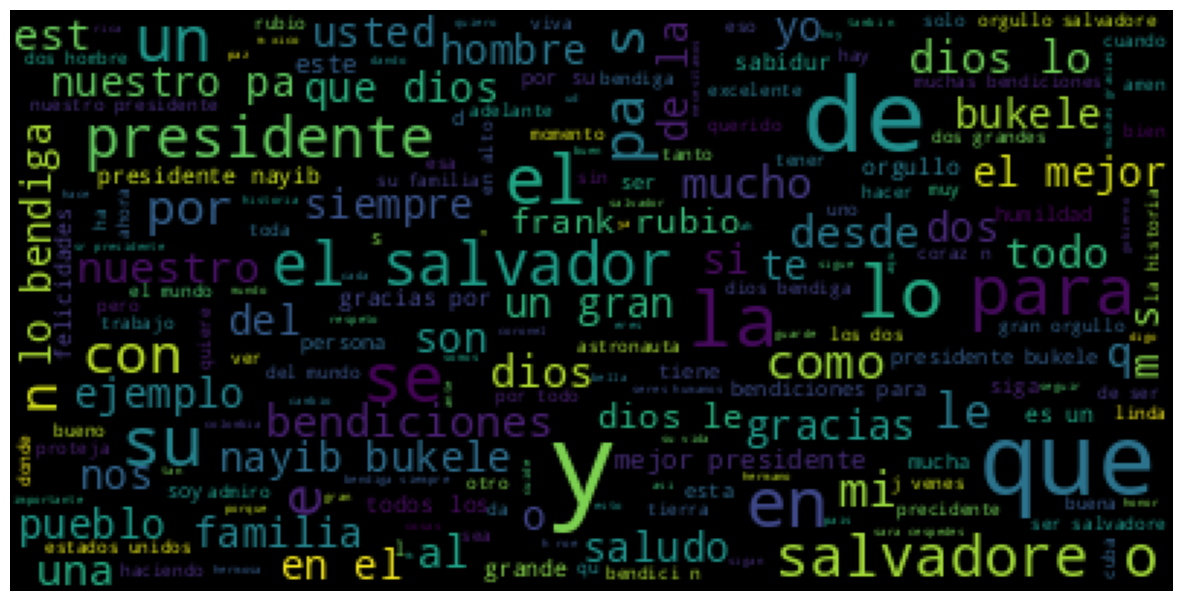

In [ ]:
show_wordcloud(df["Text_Clean"].values)

## Target Count

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]])
colors = ['gold', 'mediumturquoise', 'lightgreen'] # darkorange
fig.add_trace(go.Pie(labels=df.AP.value_counts().index,
                             values=df.label.value_counts().values), 1, 1)

fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.add_trace(go.Bar(x=df.AP.value_counts().index, y=df.label.value_counts().values, marker_color = colors), 1,2)

fig.show()


# Token Counts with simple tokenizer¶


In [ ]:
# tokenize data
df["tokenized_review"] = df.Text.apply(lambda x: tokenize(x))
# calculate token count for any sent
df["sent_token_length"] = df["tokenized_review"].apply(lambda x: len(x.split()))

In [ ]:
fig = px.histogram(df, x="sent_token_length", nbins=20, color_discrete_sequence=px.colors.cmocean.algae, barmode='group', histnorm="percent")
fig.show()

In [ ]:
(df.sent_token_length < 128).mean()


0.9819819819819819

In [ ]:
df.sent_token_length

0       9
1      53
2      15
3      27
4      15
       ..
328    20
329    13
330    14
331    35
332    17
Name: sent_token_length, Length: 333, dtype: int64

# Token Counts with BERT tokenizer


In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                          do_lower_case=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# data tokenize with bert tokenizer
df["sent_bert_token_length"] = df["Text"].apply(lambda x: len(tokenizer(x, add_special_tokens=False)["input_ids"]))


In [ ]:
fig = px.histogram(df, x="sent_bert_token_length", nbins=20, color_discrete_sequence=px.colors.cmocean.algae, barmode='group', histnorm="percent")
fig.show()

In [ ]:
(df.sent_bert_token_length < 128).mean()


0.960960960960961

# Characters Count in the Data¶


In [ ]:
# valvulate char count for each review
df['char_count'] = df['Text_Clean'].apply(lambda x: len(str(x)))


def plot_dist3(df, feature, title):
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 )
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))


    plt.suptitle(f'{title}', fontsize=24)

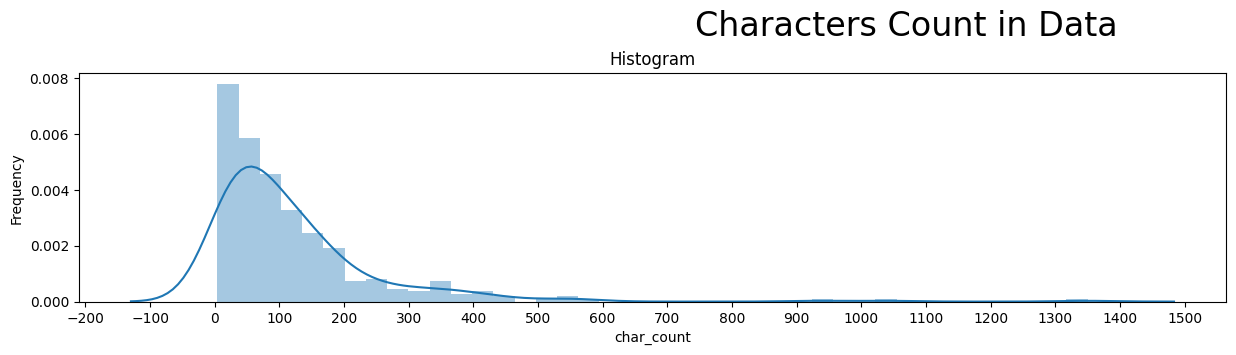

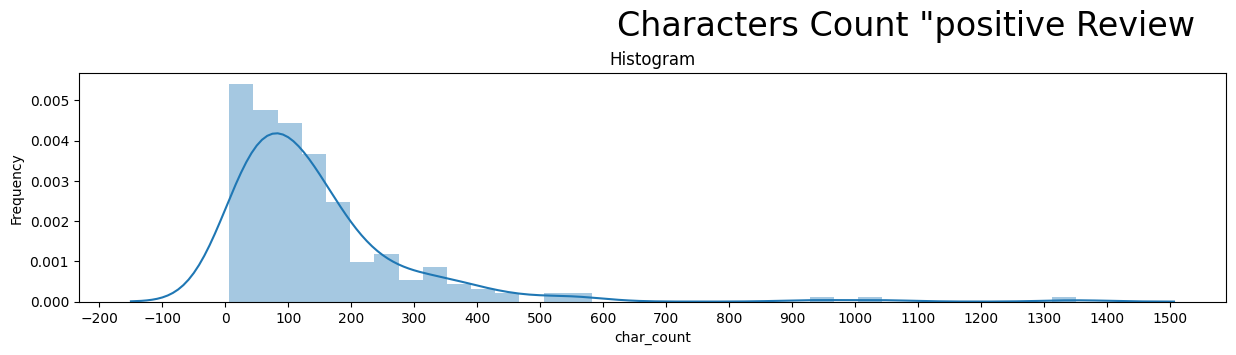

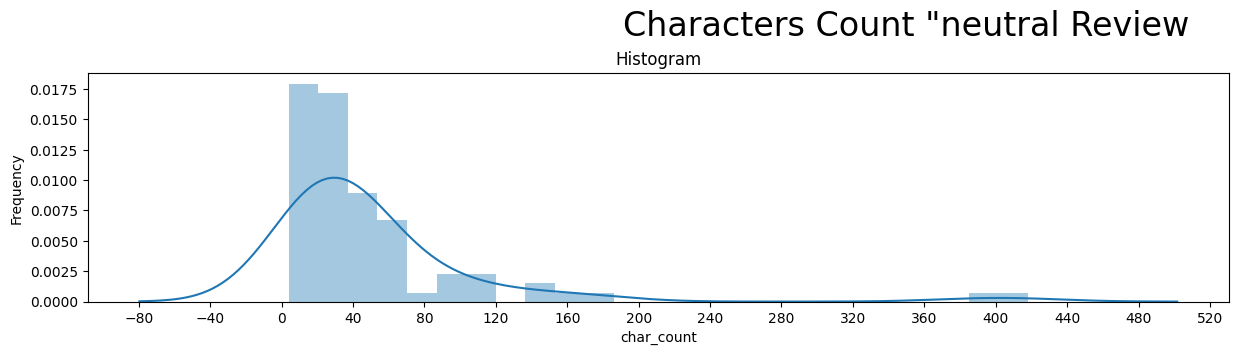

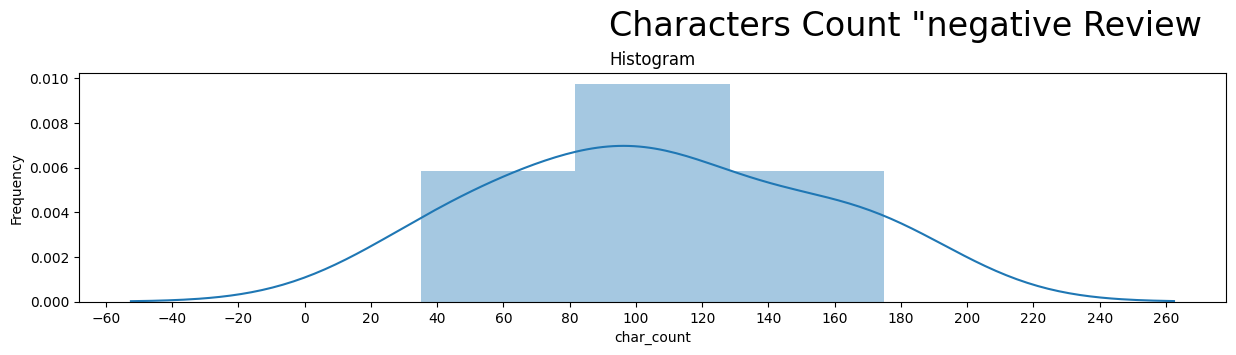

In [ ]:
plot_dist3(df, 'char_count',
           'Characters Count in Data')
plot_dist3(df[df['label'] == 0], 'char_count',
           'Characters Count "positive Review')
plot_dist3(df[df['label'] == 1], 'char_count',
           'Characters Count "neutral Review')
plot_dist3(df[df['label'] == 2], 'char_count',
           'Characters Count "negative Review')

In [ ]:
# Define the bins for character counts
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000]

# Create a new column to store the bin labels
df['char_count_bin'] = pd.cut(df['char_count'], bins=bins)

# Group by the character count bins and calculate the count in each bin
char_count_distribution = df.groupby('char_count_bin').size().reset_index(name='count')

print(char_count_distribution)

   char_count_bin  count
0         (0, 50]    120
1       (50, 100]     75
2      (100, 150]     54
3      (150, 200]     34
4      (200, 250]     14
5      (250, 300]      8
6      (300, 350]     10
7      (350, 400]      5
8      (400, 450]      5
9      (450, 500]      1
10    (500, 1000]      5


# Reviews Lengths

In [ ]:

def plot_dist3(df, feature, title):
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(24, 12))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 color='#e74c3c')
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.distplot(df.loc[:, feature],
                 ax=ax2,
                 kde_kws={'cumulative': True},
                 hist_kws={'cumulative': True},
                 color='#e74c3c')
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    plt.suptitle(f'{title}', fontsize=24)

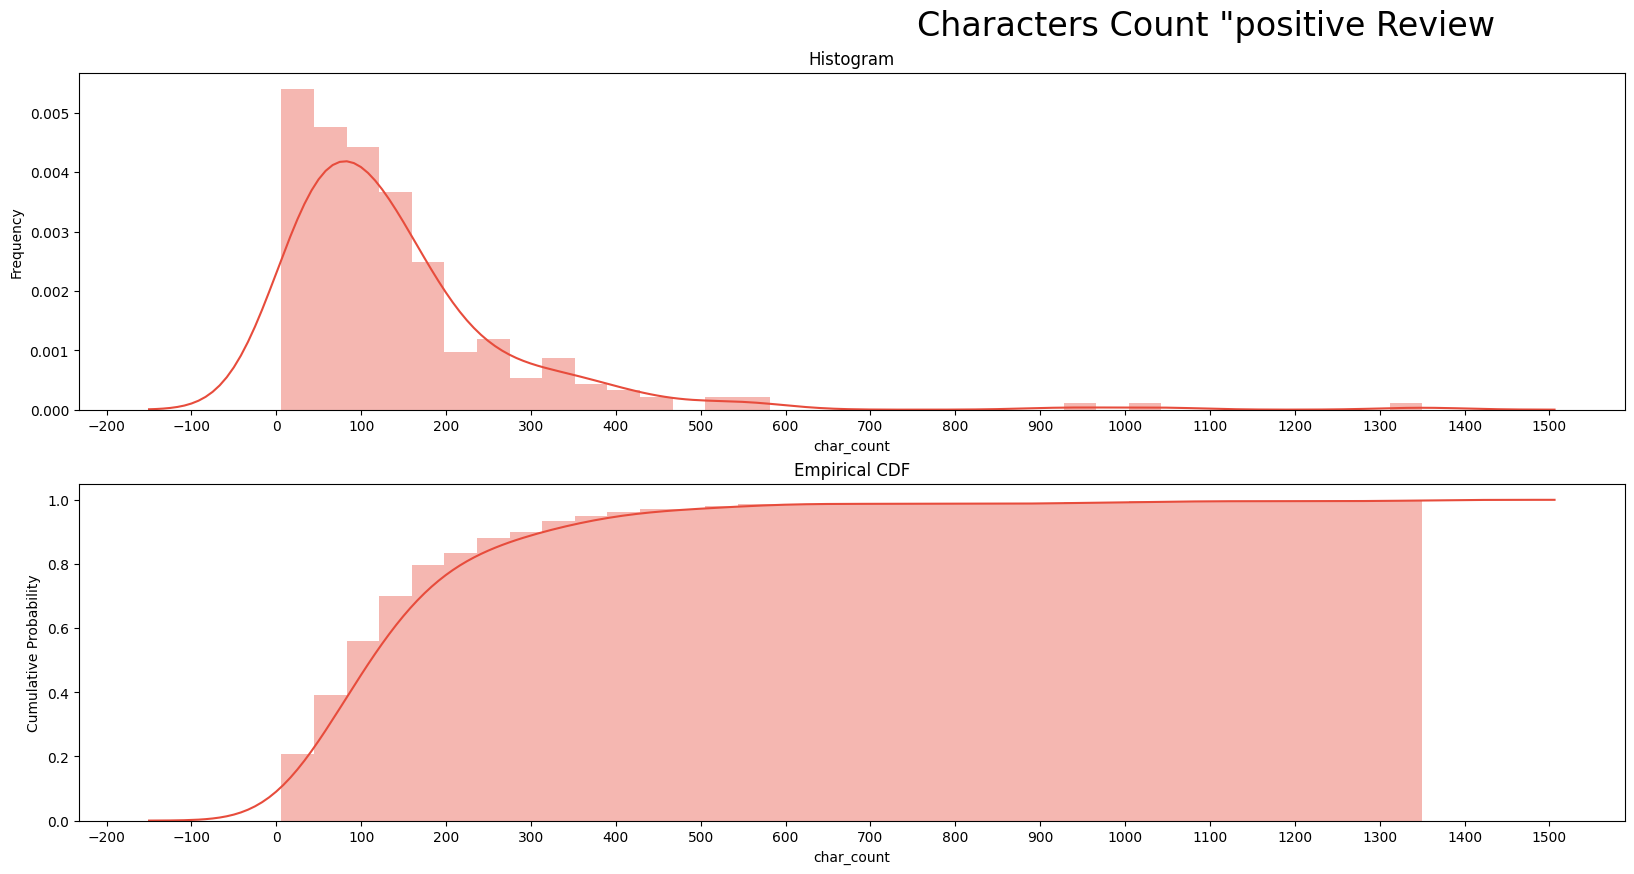

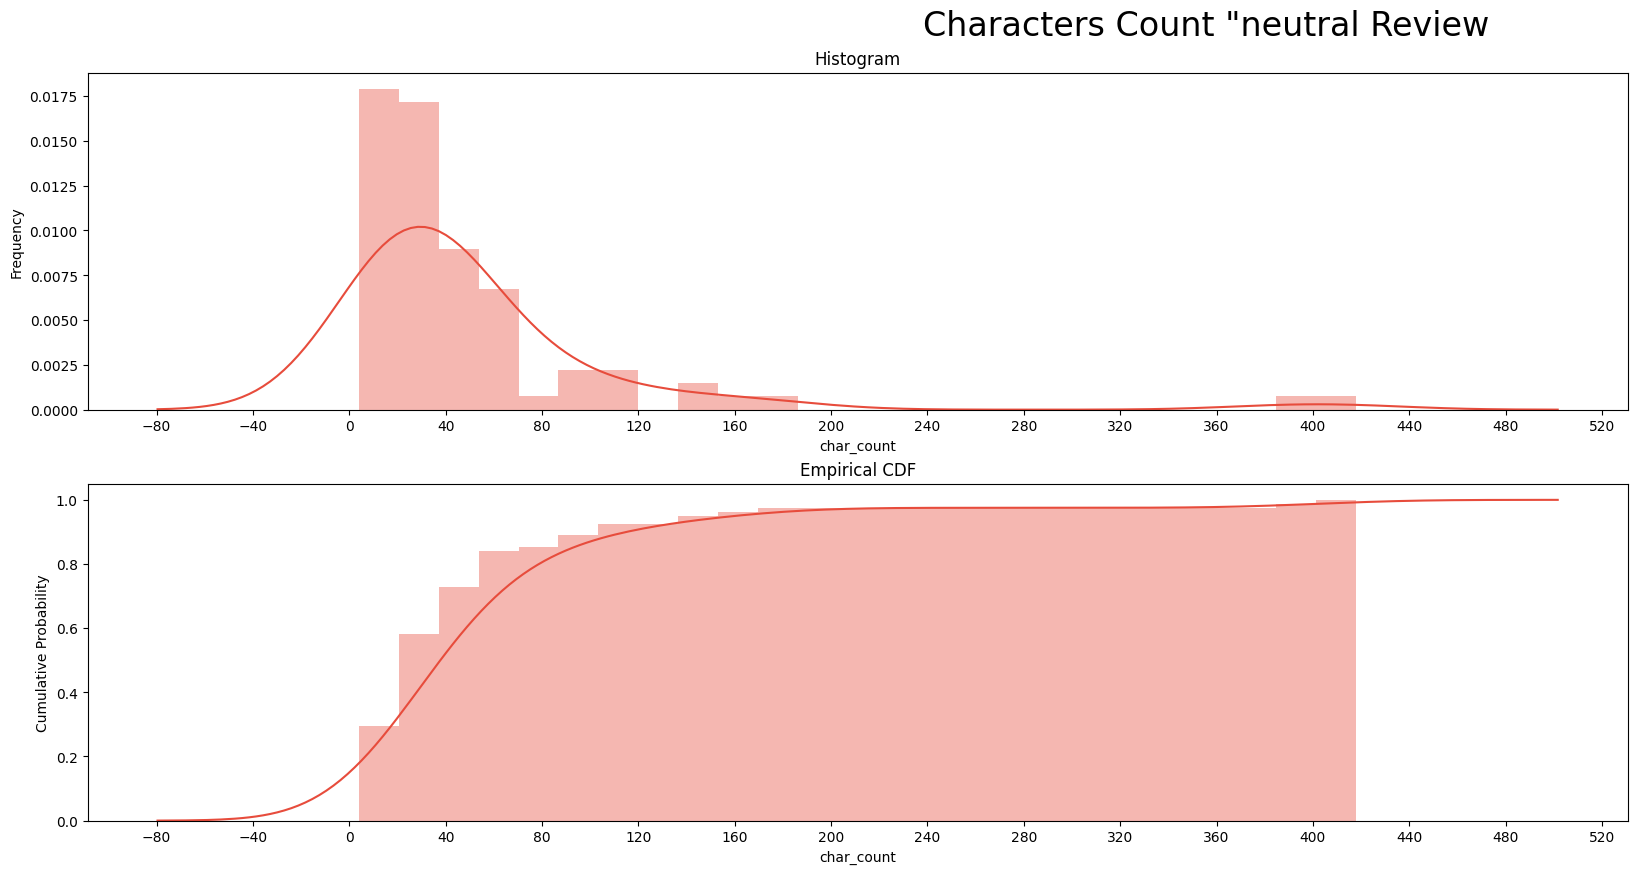

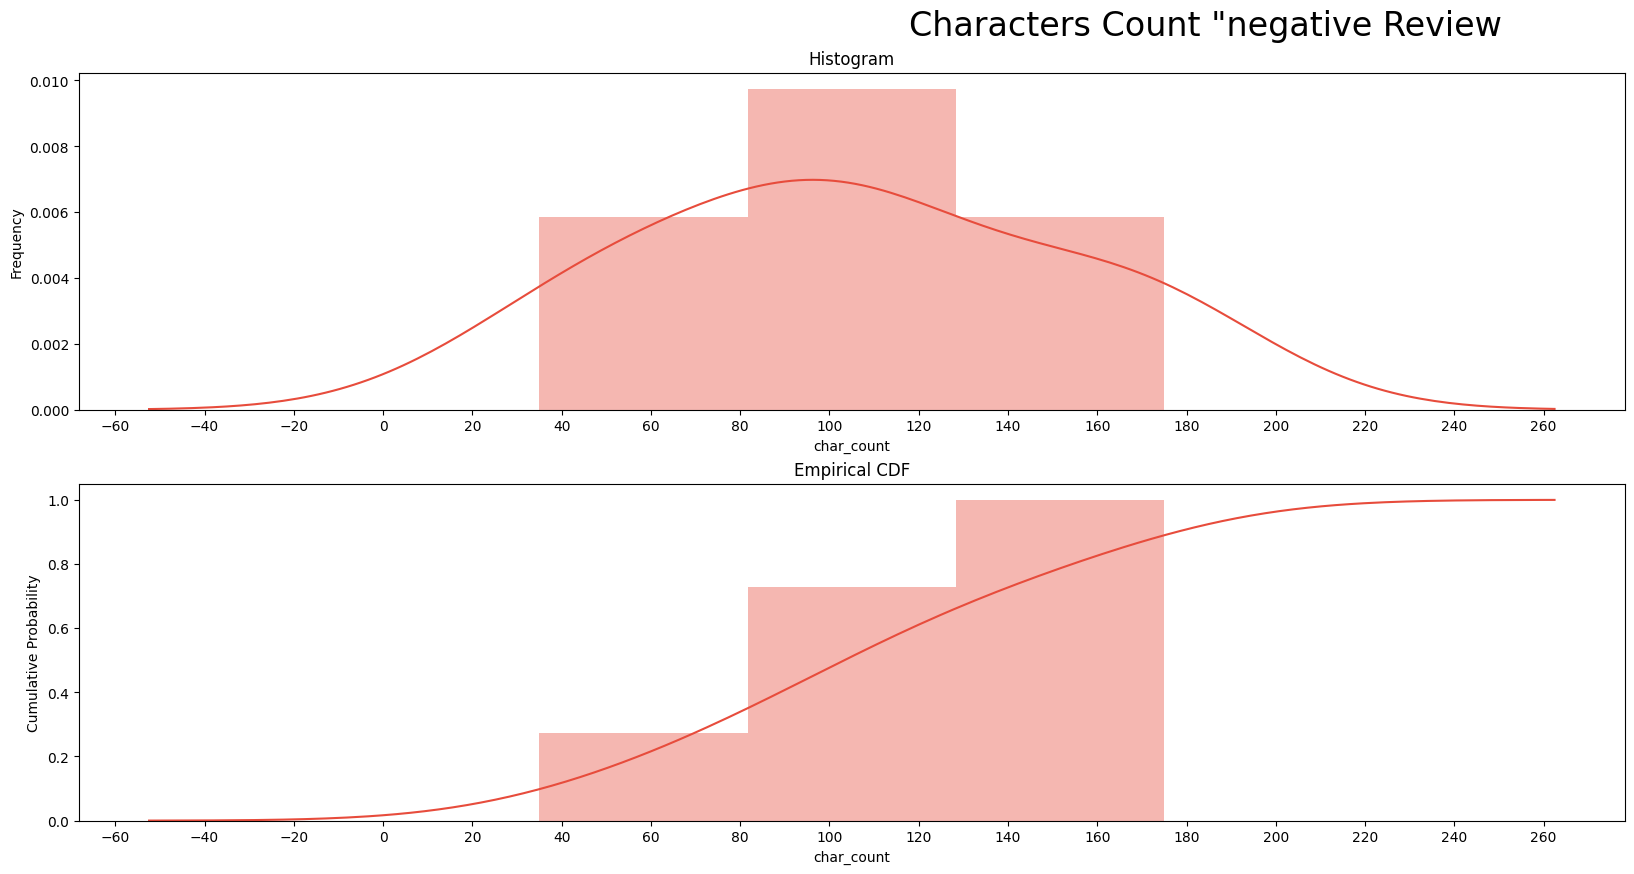

In [ ]:
plot_dist3(df[df['label'] == 0], 'char_count',
           'Characters Count "positive Review')
plot_dist3(df[df['label'] == 1], 'char_count',
           'Characters Count "neutral Review')
plot_dist3(df[df['label'] == 2], 'char_count',
           'Characters Count "negative Review')

Word Counts

In [ ]:
def plot_word_number_histogram(textno, textye, textz):

    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(18, 12), sharey=True)
    sns.distplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().map(lambda x: len(x)), ax=axes[1], color='#e74c3c')
    sns.distplot(textz.str.split().map(lambda x: len(x)), ax=axes[2], color='#e74c3c')


    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('positive')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('netrual')
    axes[2].set_xlabel('Word Count')
    axes[2].set_title('negative')

    fig.suptitle('Words Per Review', fontsize=24, va='baseline')

    fig.tight_layout()

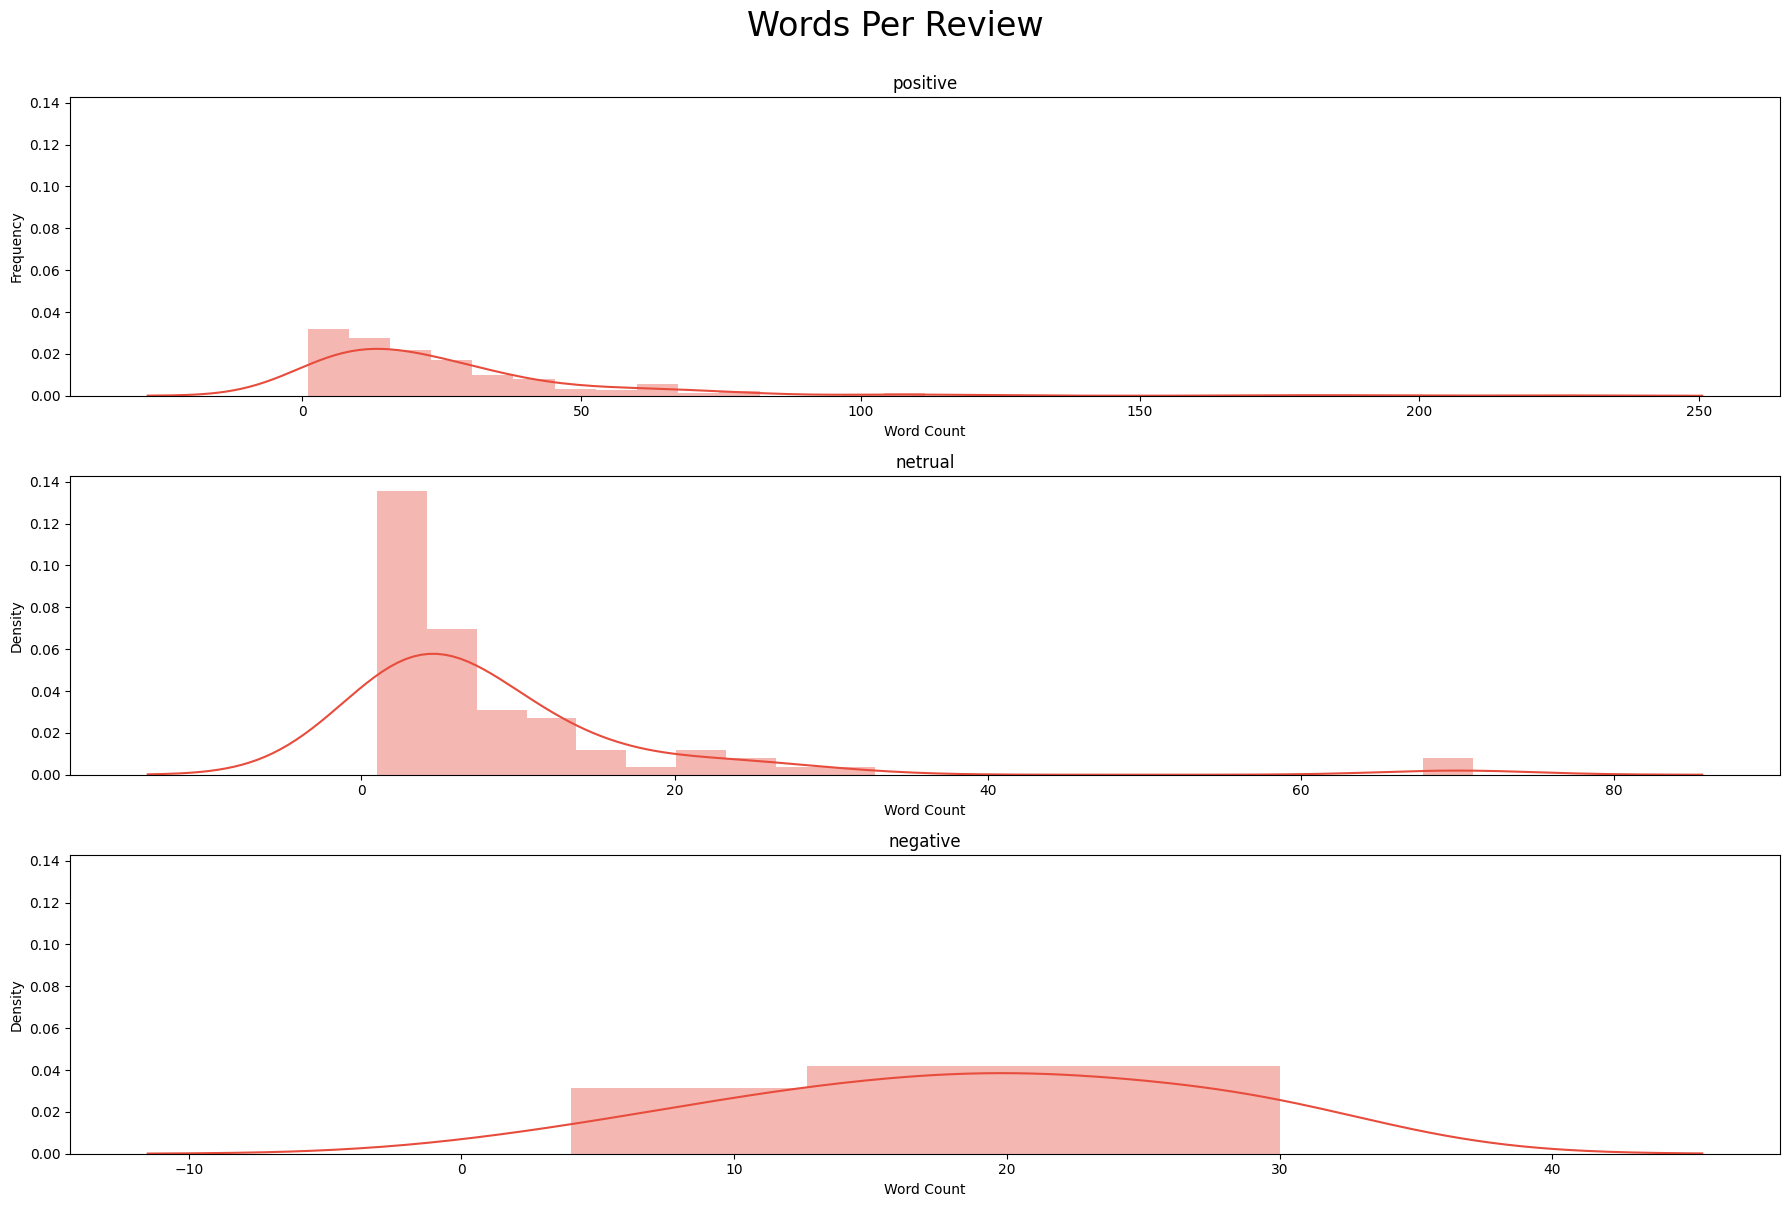

In [ ]:
plot_word_number_histogram(df[df['label'] == 0]['Text_Clean'],
                           df[df['label'] == 1]['Text_Clean'],
                           df[df['label'] == 2]['Text_Clean'],
                          )

# Most Common Words

In [ ]:
texts = df['tokenized_review']
new = texts.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:30]:
    if word not in stopWords_nltk:
        x.append(word)
        y.append(count)

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',  marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Most common Word',))

fig.update_layout( title={
        'text': "Most Common Words",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

fig.show()

# Most Common ngrams


In [ ]:
fig = make_subplots(rows=1, cols=3)
title_ = ["positive", "neutral", "negative"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []

    for word, count in most[:30]:
        if word not in stopWords_nltk:
            x.append(word)
            y.append(count)

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common ngrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ),)


fig.show()

In [ ]:
def _get_top_ngram(corpus, n=None):
    #getting top ngrams
    vec = CountVectorizer(ngram_range=(n, n),
                          max_df=0.9,
                          ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:15]

In [ ]:

fig = make_subplots(rows=1, cols=3)

title_ = ["positive", "neutral", "negative"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    top_n_bigrams = _get_top_ngram(texts, 1)[:15]
    x, y = map(list, zip(*top_n_bigrams))


    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)


fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common unigram per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))
fig.show()

## Top Bigrams

In [ ]:

fig = make_subplots(rows=1, cols=3)

title_ = ["positive", "neutral", "negative"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    top_n_bigrams = _get_top_ngram(texts, 2)[:15]
    x, y = map(list, zip(*top_n_bigrams))


    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)


fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common bigram per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))
fig.show()

## Trigram

In [ ]:
#trigram

fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    top_n_bigrams = _get_top_ngram(texts, 3)[:15]
    x, y = map(list, zip(*top_n_bigrams))

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1),

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common trigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))

fig.show()